In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import Data

In [23]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [24]:
df.columns.nunique()

14

#### Split the Data

In [25]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Split training and test data

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [28]:
x_train

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

In [29]:
x_test

array([[ 0.71755938,  0.91772503,  0.67600125, -1.5413486 ,  1.54012713,
         0.66116374,  0.92087306, -1.59932322,  0.26266406,  0.01763565,
        -0.00811294,  1.02887945,  0.14260936],
       [ 1.4552507 ,  1.86541545,  0.20192245, -0.23946126,  1.13542219,
         0.92138854,  0.52928016, -0.35805744, -0.52532812,  0.07936039,
        -0.44621167,  0.98307608,  0.80260671],
       [-0.20131927,  0.62535246,  1.22909319,  0.49944777, -0.07869263,
        -1.35124135, -1.68631121,  1.83802818, -1.48629418, -0.20280985,
        -0.93298803, -0.57423857, -0.54547299],
       [ 0.83403696, -0.69536505,  1.22909319,  1.02723994,  0.32601231,
         1.18161334,  1.14758473, -0.45353942,  1.64645519,  0.28217026,
         1.1114727 ,  0.03647306,  1.37834908],
       [-0.92606862, -1.02806488, -1.85241902,  0.00684175, -1.53563041,
        -0.36238712, -0.14054979, -0.64450339, -0.92893386, -0.16753857,
         0.77072924,  1.21209294, -0.79823793],
       [ 1.57172827, -0.271928

### Applying PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#### Logistic Regression model on Training set

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

#### Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


1.0

#### Visualising Training Results

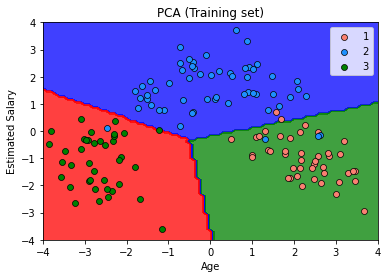

In [44]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('PCA (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### Test Set

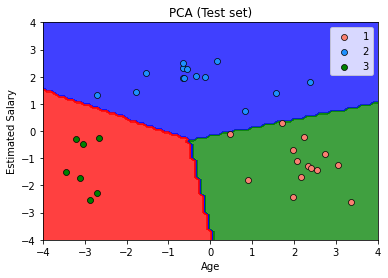

In [45]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('PCA (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
